# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

## 🛠️ Part 1: Setup and Data Loading

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

ModuleNotFoundError: No module named 'sklearn'

In [3]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h1> 1. How many unique job titles are there? <h1>

In [4]:
job = df['job_title'].nunique()

In [5]:
job

93

<h1> The result says that there are 93 job titles.

<h1>2. What is the average salary (`salary_in_usd`) per `work_year`?<h1>

In [6]:
salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()

In [7]:
salary_per_year

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

<h1> It says that in year 2020 92302.631579 is the average salary. In year 2021 94087.208696 is the average salary.In year 2022 133379.510804 is the average salary and in year 2023 148954.558413 is the average salary.

<h1> 3.  Create a bar plot showing average salary by `experience_level<h1>

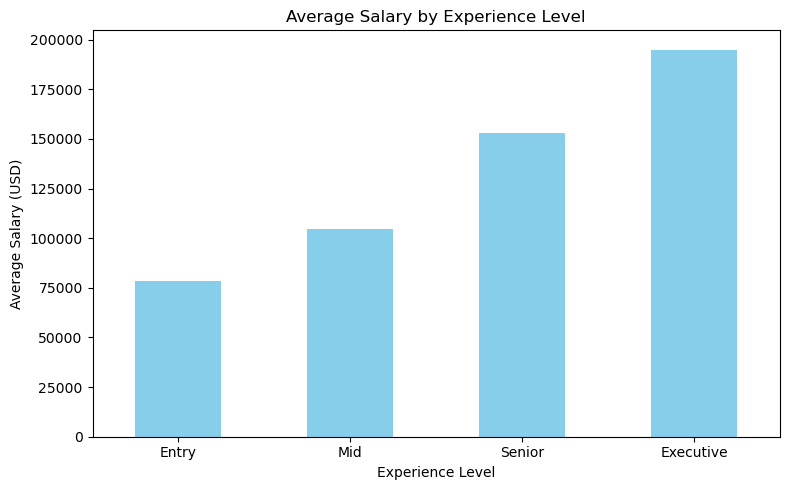

In [9]:

salary_by_experience = (
    df.groupby('experience_level', observed=True)['salary_in_usd']
    .mean()
    .reset_index()
)


experience_labels = {
    'EN': 'Entry',
    'MI': 'Mid',
    'SE': 'Senior',
    'EX': 'Executive'
}
salary_by_experience['experience_level'] = (
    salary_by_experience['experience_level'].map(experience_labels)
)


order = ['Entry', 'Mid', 'Senior', 'Executive']
salary_by_experience['experience_level'] = pd.Categorical(
    salary_by_experience['experience_level'],
    categories=order,
    ordered=True
)
salary_by_experience = salary_by_experience.sort_values('experience_level')


ax = salary_by_experience.plot(
    kind='bar',
    x='experience_level',
    y='salary_in_usd',
    legend=False,
    color='skyblue',
    figsize=(8, 5)
)


plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h1> People with more experience earn higher salaries. Executives get paid the most, while entry-level workers earn the least <h1>

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [14]:
# Example: Encode experience_level
#le = LabelEncoder()
#df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
#features = ['work_year', 'experience_level_encoded']
#X = df[features]
#y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

#X.head()

In [13]:
experience_mapping = {
    'EN': 0,  # Entry
    'MI': 1,  # Mid
    'SE': 2,  # Senior
    'EX': 3   # Executive
}

# Apply the mapping
df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Display the first few rows to confirm encoding
X.head()


,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [ ]:
# Split data into train and test sets (80/20)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
#model = LinearRegression()
#model.fit(X_train, y_train)

# Make predictions
#y_pred = model.predict(X_test)

# Evaluate
#print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
#print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

In [15]:
split = int(0.8 * len(df))
X_train = X.iloc[:split]
y_train = y.iloc[:split]
X_test = X.iloc[split:]
y_test = y.iloc[split:]

# Add bias term (intercept)
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]

# Train the model using the Normal Equation: θ = (XᵀX)⁻¹ Xᵀy
theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Make predictions
y_pred = X_test_b.dot(theta)

# Evaluate model
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.24
RMSE: 57443.78


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [17]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

#future_data = pd.DataFrame({
  #  'work_year': [2024, 2024, 2024, 2024],
 #   'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
#})

# Predict
#predicted_salaries = model.predict(future_data)

# Display results
#results = pd.DataFrame({
#    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
#    'Predicted 2024 Salary (USD)': predicted_salaries
#})
#results

In [18]:
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Add bias term for prediction
future_data_b = np.c_[np.ones((len(future_data), 1)), future_data]

# Predict 2024 salaries using our theta
predicted_salaries = future_data_b.dot(theta)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

print(results)

  Experience Level  Predicted 2024 Salary (USD)
0            Entry                 96047.444146
1              Mid                134387.106006
2           Senior                172726.767866
3        Executive                211066.429726


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h1>1. Yes, the model makes somewhat reasonable predictions because it captures the general trend that salary increases with experience level and over time.<h1>

<h1>2. Using only these two features ignores other important factors such as job title, company size, location, industry, and employment type. These missing variables can strongly influence salaries, making the model too simple and less accurate.<h1>

<h1>3. You could improve it by adding more relevant features (like job_title, company_location, and employment_type) and by using better encoding methods for categorical data (e.g., one-hot encoding). Collecting more data and handling outliers would also make predictions more reliable.<h1>

<h1>4. A high R² only shows that the model fits the training data well—it doesn’t mean the model will perform well on new data. You also need to check other metrics (like RMSE) and test how well the model generalizes to unseen samples.<h1>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀